<a href="https://colab.research.google.com/github/Hyenni/analysis_Astronomy_Data/blob/master/horsehead_fitsfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SAMPLE 06. Make a class.

###create module 'fitsfile' => It is perform the preceding tasks (sample1 ~ 4) at once.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class FitsFile:
	def __init__(self):
		# Initialize variables.
		self.file_path = ""
		self.header = ""
		self.data = ""

		self.bitpix = 0
		self.naxis = 0
		self.naxis1 = 0
		self.naxis2 = 0
		self.bzero = 0
		self.bscale = 1.0

    
	def get_value(self, keyword):
		value = ""
		records = int(len(self.header) / 80)

		for i in range(records):
			record = self.header[i*80:(i+1)*80]
			if(record.startswith(keyword)):
				begin = 9;
				end = record.find('/', begin, (i+1)*80)
				if(end == -1):
					end = (i+1)*80
				value = record[begin:end].strip()
				break
			if(record.startswith("END")):
				break

		return value


	def load_file(self, file_path):
		# Open a file.
		self.file_path = file_path
		file = open(self.file_path, "rb")


		# Read a header from the file.
		end_found = False
		while(end_found == False):
			buffer = file.read(2880)

			if(buffer == ""):
				break

			buffer = buffer.decode("ascii")
			self.header = self.header + buffer

			for i in range(80):
				record = buffer[i*80:(i+1)*80]
				if(record.startswith('END')):
					end_found = True
					break

		if (end_found == False):
			print("The file is not correct FITS format.")

      
		# Decode the header.
		value = self.get_value("BITPIX")
		if(value != ""):	self.bitpix = int(value)

		value = self.get_value("NAXIS")
		if(value != ""):	self.naxis = int(value)

		value = self.get_value("NAXIS1")
		if(value != ""):	self.naxis1 = int(value)

		value = self.get_value("NAXIS2")
		if(value != ""):	self.naxis2 = int(value)

		value = self.get_value("BZERO")
		if(value != ""):	self.bzero = int(value)

		value = self.get_value("BSCALE")
		if(value != ""):	self.bscale = float(value)


		# Read a data from the file.

		# binary data (byte)
		self.data = file.read(self.naxis1 * self.naxis2 * int(self.bitpix/8))

		# 1-D array (signed short)
		self.data = np.frombuffer(self.data, dtype=np.dtype(">i2"))

		# 2-D array (signed short)
		self.data = self.data.reshape((self.naxis2, self.naxis1))

		# physical data (float64)
		self.data = (self.data + self.bzero) / self.bscale


		# Close the file.
		file.close()


In [22]:
from google.colab import files
files.upload()

Saving fitsfile.py to fitsfile (1).py


{'fitsfile.py': b'#\r\n# SAMPLE 05. Make a class.\r\n#\r\n\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport matplotlib.cm as cm\r\n\r\nclass FitsFile:\r\n\tdef __init__(self):\r\n\t\t# Initialize variables.\r\n\t\tself.file_path = ""\r\n\t\tself.header = ""\r\n\t\tself.data = ""\r\n\r\n\t\tself.bitpix = 0\r\n\t\tself.naxis = 0\r\n\t\tself.naxis1 = 0\r\n\t\tself.naxis2 = 0\r\n\t\tself.bzero = 0\r\n\t\tself.bscale = 1.0\r\n\r\n\t#\r\n\t#\r\n\tdef get_value(self, keyword):\r\n\t\tvalue = ""\r\n\t\trecords = int(len(self.header) / 80)\r\n\r\n\t\tfor i in range(records):\r\n\t\t\trecord = self.header[i*80:(i+1)*80]\r\n\t\t\tif(record.startswith(keyword)):\r\n\t\t\t\tbegin = 9;\r\n\t\t\t\tend = record.find(\'/\', begin, (i+1)*80)\r\n\t\t\t\tif(end == -1):\r\n\t\t\t\t\tend = (i+1)*80\r\n\t\t\t\tvalue = record[begin:end].strip()\r\n\t\t\t\tbreak\r\n\t\t\tif(record.startswith("END")):\r\n\t\t\t\tbreak\r\n\r\n\t\treturn value\r\n\r\n\r\n\tdef load_file(self, file_path):\r\n\t\t

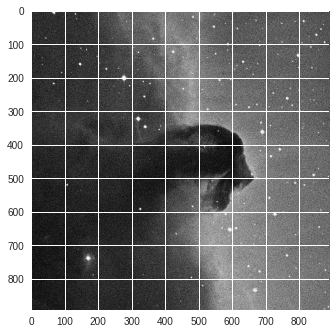

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import fitsfile

fits = fitsfile.FitsFile()
fits.load_file("HorseHead.fits")


# Display an image.
plt.imshow(fits.data, cmap=cm.gray)
plt.show()

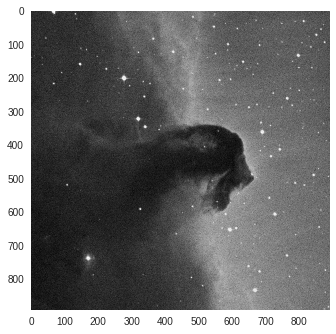

In [24]:
# Display an image.
plt.imshow(fits.data, cmap=cm.gray)
plt.grid(None)
plt.show()

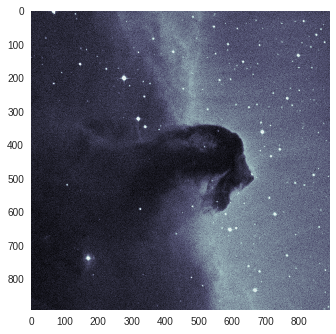

In [25]:
# Display an image.
plt.imshow(fits.data, cmap=cm.bone)
plt.grid(None)
plt.show()

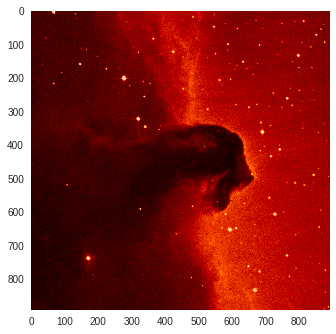

In [26]:
# Display an image.
plt.imshow(fits.data, cmap=cm.gist_heat)
plt.grid(None)
plt.show()